In [1]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df


import json
import os

def get_predictor_data(studies):
    train_data=[]
    for study_folder in studies: 
        data=[]
        #study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #test_acc=test_acc.rename(columns={"test_loss":"test_acc"})
                #print(test_acc.columns)
                #if len(test_acc)>49:
                test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                #test_acc_piv["best_acc"]=test_acc["acc"].max()
                data.append(test_acc_piv)
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset="LaMelo"
test_name_baseline="T2_5"
test_name="T4_5"
main_path="/home/woody/iwb3/iwb3021h/THESIS_RESULTS"
num_generations=3

# Total results

In [ ]:
import json
tests_completed=["T0_Proxy","T0_Resnet","T1_Proxy","T2_Proxy","T3_Proxy","T4_Proxy","T6_Proxy","T7_Proxy"]
total_results={}
for t in tests_completed:
    total_results_path=f"{main_path}/{t}/final_results.json"
    with open(total_results_path, 'r') as file:
           total_results[t]= json.load(file)


In [11]:
import json
tests_completed=["T0_Proxy/seed_1","T0_Basic/seed_1","T0_Resnet/seed_1","T1_Proxy/seed_1","T2_Proxy/seed_1","T3_Proxy/seed_1","T4_Proxy/seed_1","T6_Proxy/seed_1","T7_Proxy/seed_1",
                "T0_Proxy/seed_2","T1_Proxy/seed_2","T2_Proxy/seed_2","T3_Proxy/seed_2","T4_Proxy/seed_2","T6_Proxy/seed_2",
                "T0_Proxy/seed_3","T1_Proxy/seed_3","T2_Proxy/seed_3","T3_Proxy/seed_3","T4_Proxy/seed_3","T6_Proxy/seed_3",
               ]
total_results={}
for t in tests_completed:
    total_results_path=f"{main_path}/{t}/final_results.json"
    with open(total_results_path, 'r') as file:
           total_results[t]= json.load(file)


In [12]:
total_results_df=pd.DataFrame(total_results).T
total_results_df=total_results_df.drop(columns=["Sokoto_Runtime","Sokoto_Params","Sokoto_Raw_Score","Sokoto_Adj_Score"])
cols=total_results_df.columns
runtime_df=total_results_df[[col for col in cols if "Runtime" in col]]
runtime_df.columns=[col[:-8] for col in runtime_df.columns]

params_df=total_results_df[[col for col in cols if "Params" in col]]
params_df.columns=[col[:-7] for col in params_df.columns]

raw_score_df=total_results_df[[col for col in cols if "Raw_Score" in col]]
raw_score_df.columns=[col[:-10] for col in raw_score_df.columns]

adj_score_df=total_results_df[[col for col in cols if "Adj_Score" in col]]
adj_score_df.columns=[col[:-10] for col in adj_score_df.columns]


In [13]:
runtime_df

,LaMelo,Gutenberg,Adaline,Chester,Sadie,Mateo,Caitie
T0_Proxy/seed_1,1303.00,1429.03,2293.13,1678.75,3342.35,3127.73,3456.98
T0_Basic/seed_1,1544.66,2155.21,2374.44,1397.16,1311.88,2287.03,3049.77
T0_Resnet/seed_1,5970.95,5797.31,7330.22,3156.78,6927.20,10032.20,9141.35
T1_Proxy/seed_1,9330.67,8589.88,10674.42,8120.75,14343.23,11330.99,14470.92
T2_Proxy/seed_1,9141.27,9710.75,10662.26,6823.61,11454.87,10307.68,14224.07
T3_Proxy/seed_1,8912.98,7982.73,9967.72,8468.07,10072.87,10953.74,16018.66
T4_Proxy/seed_1,9071.44,10276.53,11484.40,6832.68,14290.65,11056.00,13373.52
T6_Proxy/seed_1,10537.44,10733.76,10680.89,7150.20,11207.53,12068.96,16088.78
T7_Proxy/seed_1,15711.34,19159.08,17321.46,14740.04,27293.01,19285.87,27115.24
T0_Proxy/seed_2,1736.49,1097.49,2342.46,1369.01,1637.71,2317.02,3031.92


In [14]:
runtime_df = runtime_df.groupby(runtime_df.index.str[:-7]).mean()
params_df = params_df.groupby(params_df.index.str[:-7]).mean()
raw_score_df = raw_score_df.groupby(raw_score_df.index.str[:-7]).mean()
adj_score_df = adj_score_df.groupby(adj_score_df.index.str[:-7]).mean()

In [15]:
runtime_df

,LaMelo,Gutenberg,Adaline,Chester,Sadie,Mateo,Caitie
T0_Basic,1544.660000,2155.210000,2374.440000,1397.160000,1311.880000,2287.030000,3049.770000
T0_Proxy,1501.396667,1381.170000,2443.913333,1411.626667,2896.276667,2532.770000,3748.913333
T0_Resnet,5970.950000,5797.310000,7330.220000,3156.780000,6927.200000,10032.200000,9141.350000
T1_Proxy,10761.616667,9236.533333,11233.116667,7434.430000,15225.573333,10986.300000,14358.840000
T2_Proxy,11517.440000,9903.210000,10394.436667,7903.703333,10420.523333,10670.216667,15229.450000
T3_Proxy,10299.156667,9458.993333,9990.300000,7881.336667,12440.376667,11029.663333,15119.960000
T4_Proxy,11116.490000,10082.086667,11090.023333,7724.570000,14112.376667,11436.990000,14982.470000
T6_Proxy,11474.756667,10363.653333,10939.216667,8186.403333,14004.433333,11625.103333,15564.633333
T7_Proxy,15711.340000,19159.080000,17321.460000,14740.040000,27293.010000,19285.870000,27115.240000


In [16]:
total_sum_df=adj_score_df.sum(axis=1).sort_values()
total_sum_df=pd.DataFrame(total_sum_df,columns=["score"]).reset_index()

In [17]:
total_time_df=runtime_df.sum(axis=1).sort_values()
total_time_df=pd.DataFrame(total_time_df,columns=["time"]).reset_index()

total_time_df['score'] =total_time_df['time'] / 3600
#total_time_df['score'] =total_time_df['time'] / 60

In [18]:
total_time_df

,index,time,score
0,T0_Basic,14120.150000,3.922264
1,T0_Proxy,15916.066667,4.421130
2,T0_Resnet,48356.010000,13.432225
3,T2_Proxy,76038.980000,21.121939
4,T3_Proxy,76219.786667,21.172163
5,T1_Proxy,79236.410000,22.010114
6,T4_Proxy,80545.006667,22.373613
7,T6_Proxy,82158.200000,22.821722
8,T7_Proxy,140626.040000,39.062789


In [19]:
total_sum_time_df=(total_sum_df.sort_values(by="index").set_index("index")[["score"]]/total_time_df.sort_values(by="index").set_index("index")[["score"]]).reset_index()

In [20]:
total_sum_df

,index,score
0,T0_Resnet,18.858000
1,T1_Proxy,21.579333
2,T0_Basic,21.902000
3,T0_Proxy,23.266333
4,T2_Proxy,23.391667
5,T3_Proxy,23.762000
6,T4_Proxy,25.594667
7,T6_Proxy,27.025333
8,T7_Proxy,28.981000


In [21]:
total_time_df

,index,time,score
0,T0_Basic,14120.150000,3.922264
1,T0_Proxy,15916.066667,4.421130
2,T0_Resnet,48356.010000,13.432225
3,T2_Proxy,76038.980000,21.121939
4,T3_Proxy,76219.786667,21.172163
5,T1_Proxy,79236.410000,22.010114
6,T4_Proxy,80545.006667,22.373613
7,T6_Proxy,82158.200000,22.821722
8,T7_Proxy,140626.040000,39.062789


In [22]:
total_sum_time_df

,index,score
0,T0_Basic,5.584020
1,T0_Proxy,5.262531
2,T0_Resnet,1.403937
3,T1_Proxy,0.980428
4,T2_Proxy,1.107458
5,T3_Proxy,1.122323
6,T4_Proxy,1.143967
7,T6_Proxy,1.184193
8,T7_Proxy,0.741908


In [79]:
color_map = {
    'T7_Proxy': '#636EFA',  # Blue
    'T0_Proxy': '#EF553B',  # Red
    'T0_Basic': '#9467BD',  # Purple
    'T0_Resnet': '#7F7F7F',  # Gray
    'T1_Proxy': '#00CC96',  # Green
    'T2_Proxy': '#AB63FA',  # Light Purple
    'T3_Proxy': '#FF4500',  # Light Purple
    'T4_Proxy': '#FFA15A',  # Orange
    'T6_Proxy': '#19D3F3',  # Cyan
    'ResNext': '#B6E880',  # Light Green
    'ResNet-18': '#FF97FF',  # Pink
    'Bonsai-Net': '#FFA07A',  # Salmon
    'BestCompetition': '#FECB52',  # Yellow
}


In [116]:
total_sum_time_df.sort_values(by="score",ascending=True)

,index,score
4,T6_5,1.071231
0,T0_5,1.213620
2,T2_5,1.322298
3,T4_5,1.330319
1,T1_5,1.355037
5,T7_0,7.586963


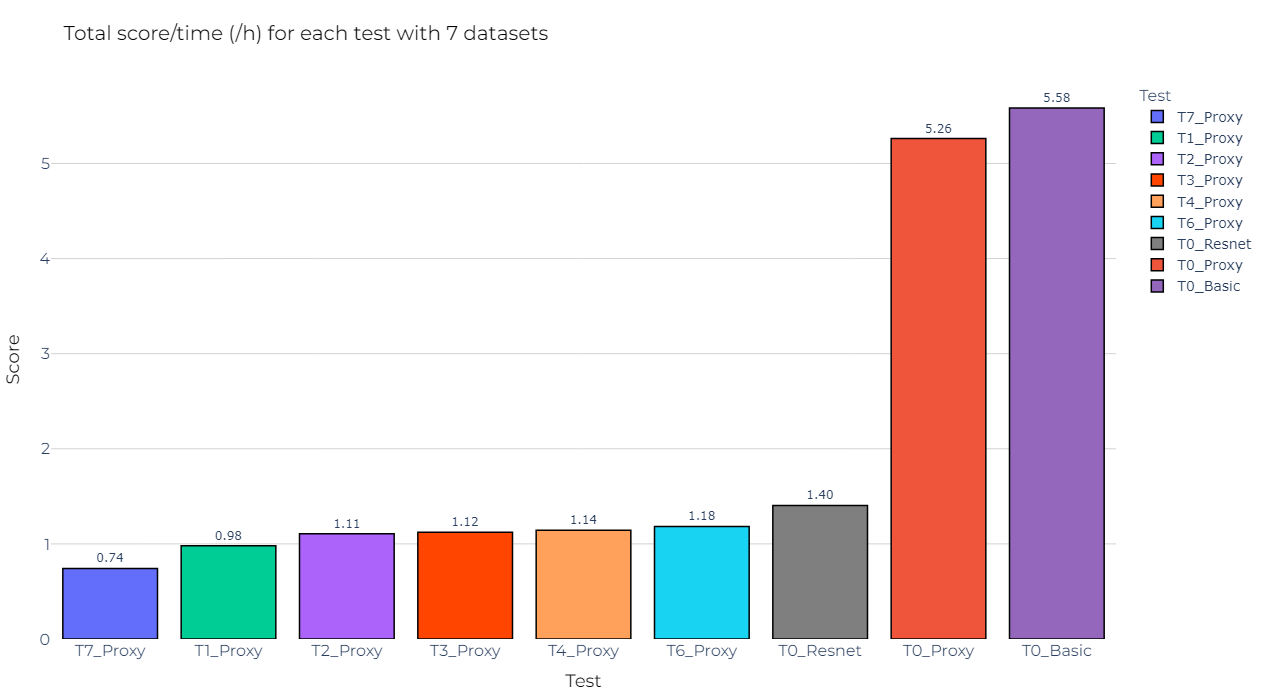

In [84]:
import plotly.express as px
#fig = px.bar(total_time_df, 
#             x='index', 
#             y='score', 
#             text='score',  # Display the score values on the bars
#             color='index',  # Color by the index for distinction
#color_discrete_map=color_map,
#             title='Total time (h) for each test with 6 datasets')  # Add a meaningful title
#fig = px.bar(total_sum_df, 
#             x='index', 
#             y='score', 
#             text='score',  # Display the score values on the bars
#            color='index',  # Color by the index for distinctio
#             color_discrete_map=color_map,
#             title='Total score for each test with 6 datasets')  # Add a meaningful title
fig = px.bar(total_sum_time_df.sort_values(by="score",ascending=True),#[total_sum_time_df["index"]!="T7_0"], 
            x='index', 
             y='score', 
             text='score',  # Display the score values on the bars
             color='index',  # Color by the index for distinction
            color_discrete_map=color_map,
             title='Total score/time (/h) for each test with 7 datasets')  # Add a meaningful title

# Customizing the layout for a more professional look
fig.update_layout(
    height=700,  # Increase the height
    width=900,  # Adjust the width
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis_title='Test',  # X-axis label
    yaxis_title='Score',  # Y-axis label
    xaxis_title_font=dict(size=18, family='Montserrat', color='black'),  # X-axis title font
    yaxis_title_font=dict(size=18, family='Montserrat', color='black'),  # Y-axis title font
    xaxis_tickfont=dict(size=16, family='Montserrat'),  # X-axis tick labels font
    yaxis_tickfont=dict(size=16, family='Montserrat'),  # Y-axis tick labels font
    legend_title_text='Test',  # Legend title
    legend_title_font=dict(size=16, family='Montserrat'),  # Legend title font
    legend_font=dict(size=14),  # Legend labels font
    plot_bgcolor='white',  # Background color
    margin=dict(l=40, r=40, t=80, b=40),  # Margins around the plot
    yaxis=dict(gridcolor='lightgrey')#, range=[0,8])  # Add light gridlines for better readability
    
)
#fig.update_yaxes(range=[10, 22], row=row, col=col)

# Add gridlines and adjust bar text size
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the updated plot
fig.show()

In [85]:
fig.write_image("thesis_plots/final_tests/score_time.svg", format="SVG")
fig.write_image("thesis_plots/final_tests/score_time.png", format="PNG")

In [34]:
raw_score_df

,LaMelo,Gutenberg,Adaline,Chester,Sadie,Mateo,Caitie
T0_Basic,78.300000,45.433000,96.510000,60.266000,95.852000,95.070000,79.740000
T0_Proxy,86.230000,45.361333,95.386667,60.289333,96.107000,93.780000,71.283333
T0_Resnet,86.420000,44.733000,94.160000,56.746000,94.846000,91.410000,75.820000
T1_Proxy,86.100000,43.589000,95.643333,56.789000,96.145333,93.276667,70.280000
T2_Proxy,86.253333,44.577667,95.386667,60.022667,95.642333,94.146667,72.023333
T3_Proxy,86.290000,46.028000,95.773333,58.592667,95.699667,94.080000,72.563333
T4_Proxy,85.513333,44.489000,95.676667,59.249333,95.265333,95.743333,77.633333
T6_Proxy,86.130000,46.705667,96.180000,59.779333,95.650000,95.480000,78.220000
T7_Proxy,87.450000,46.233000,96.360000,62.086000,95.018000,95.810000,80.230000


In [36]:

raw_score_df.loc["ResNext"] = [93.97,40.3,91.42,55.15,89.9,90.57, 46.23]
raw_score_df.loc["ResNet-18"] = [97,49.98,92.08,57.83,80.33,91.55, 45.56]

In [37]:
raw_score_df.loc["BestCompetition"] = [89.71,50.85,95.06,62.98,96.08,95.45, 73.08]
raw_score_df.loc["Bonsai-Net"] = [87.65,48.57,97.91, 60.76, 95.66,97.17, 91.47]

In [50]:
raw_score_df=raw_score_df[~raw_score_df.index.isin(["T0_Basic","T0_Resnet","T3_Proxy","T4_Proxy"])]

In [51]:
raw_score_df

,LaMelo,Gutenberg,Adaline,Chester,Sadie,Mateo,Caitie
T0_Proxy,86.230000,45.361333,95.386667,60.289333,96.107000,93.780000,71.283333
T1_Proxy,86.100000,43.589000,95.643333,56.789000,96.145333,93.276667,70.280000
T2_Proxy,86.253333,44.577667,95.386667,60.022667,95.642333,94.146667,72.023333
T6_Proxy,86.130000,46.705667,96.180000,59.779333,95.650000,95.480000,78.220000
T7_Proxy,87.450000,46.233000,96.360000,62.086000,95.018000,95.810000,80.230000
ResNext,93.970000,40.300000,91.420000,55.150000,89.900000,90.570000,46.230000
ResNet-18,97.000000,49.980000,92.080000,57.830000,80.330000,91.550000,45.560000
BestCompetition,89.710000,50.850000,95.060000,62.980000,96.080000,95.450000,73.080000
Bonsai-Net,87.650000,48.570000,97.910000,60.760000,95.660000,97.170000,91.470000


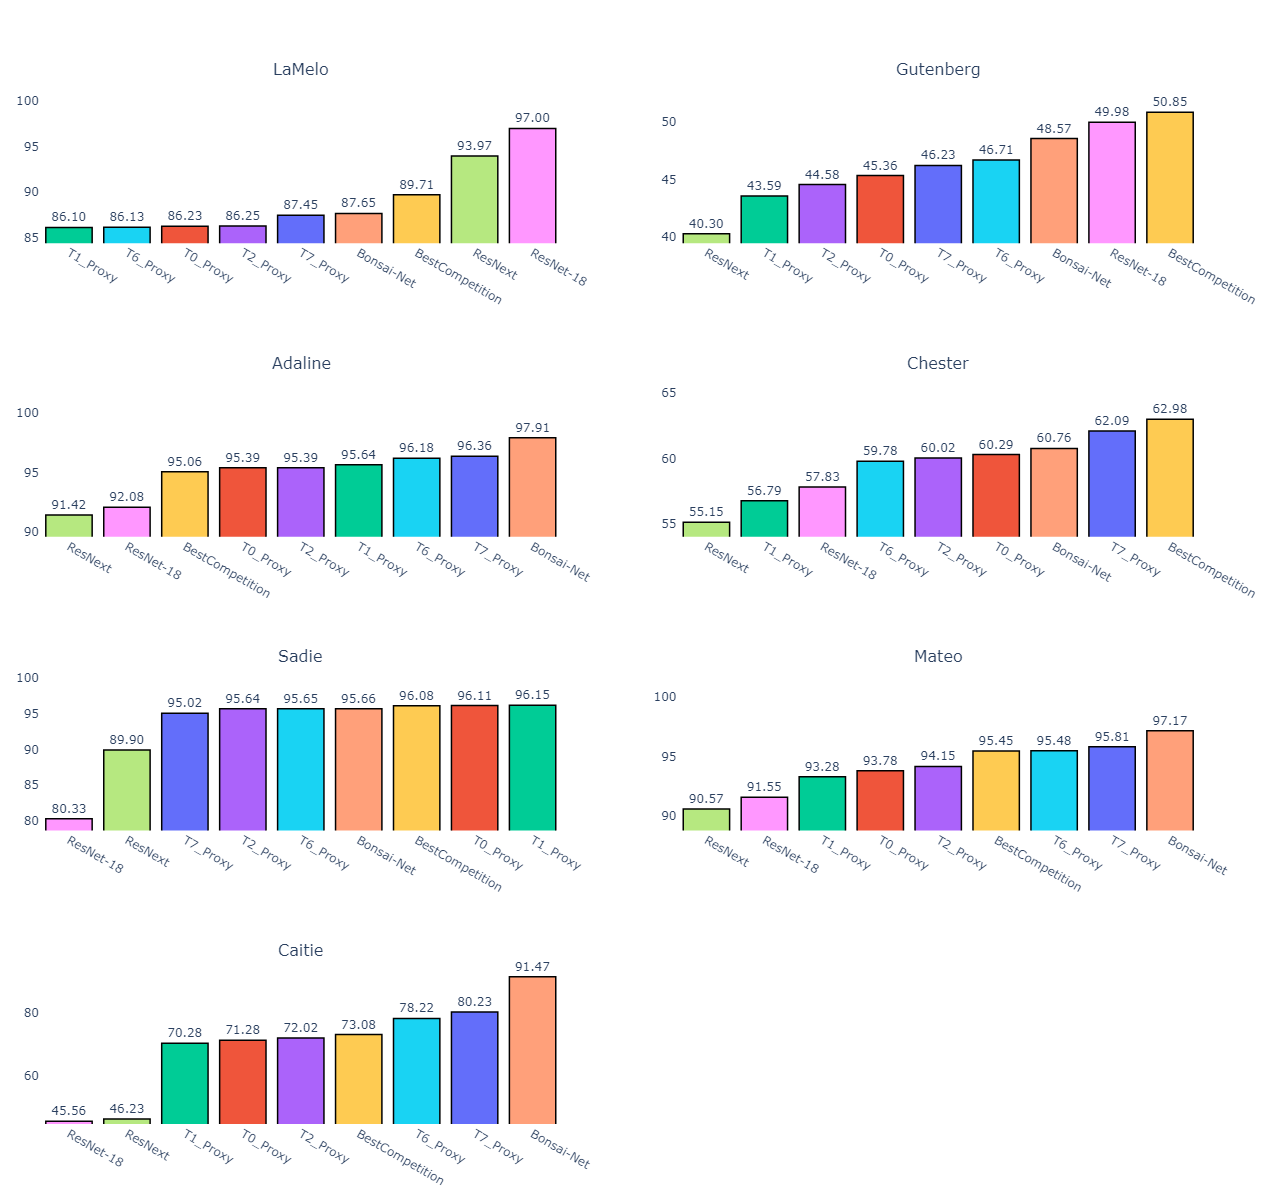

In [86]:
import plotly.subplots as sp
import plotly.graph_objects as go

plot_df = raw_score_df  # Asumiendo que `raw_score_df` es el DataFrame

# Crear subparcelas con 4 filas y 2 columnas
fig = sp.make_subplots(rows=4, cols=2, subplot_titles=plot_df.columns)

# Definir el mapa de colores
def get_color_for_index(index):
    return color_map.get(index, '#636EFA')  # Default a azul si no está en el mapa

# Agregar trazos para cada columna y mostrar los valores de las barras
for i, column in enumerate(plot_df.columns):
    row = i // 2 + 1  # Modificado para 2 columnas por fila (4 filas)
    col = i % 2 + 1   # Modificado para 2 columnas por fila
    
    # Ordenar los valores para la columna actual
    sorted_df = plot_df[[column]].sort_values(by=column)

    # Obtener los índices y valores ordenados
    sorted_indices = sorted_df.index
    sorted_values = sorted_df[column]

    # Mapear los colores para los índices ordenados
    colors = [get_color_for_index(idx) for idx in sorted_indices]
    
    # Añadir la barra para la columna actual con bordes
    fig.add_trace(
        go.Bar(
            x=sorted_indices, 
            y=sorted_values, 
            name=column, 
            marker=dict(
                color=colors, 
                line=dict(color='black', width=1.5)  # Añadir borde negro a las barras
            ),
            showlegend=False,
            text=sorted_values,  # Mostrar los valores ordenados
            textposition='outside',  # Posición del texto fuera de las barras
            texttemplate='%{text:.2f}',  # Formato del texto a 2 decimales
        ),
        row=row, col=col
    )

# Ajustar automáticamente el rango del eje y para cada subparcela
for i, column in enumerate(plot_df.columns):
    row = i // 2 + 1  # Modificado para 2 columnas por fila
    col = i % 2 + 1   # Modificado para 2 columnas por fila
    min_val = plot_df[column].min()
    max_val = plot_df[column].max()
    # Añadir un pequeño margen al rango
    fig.update_yaxes(range=[min_val * 0.98, max_val * 1.055], row=row, col=col)

# Actualizar el diseño
fig.update_layout(
    height=1200,  # Aumentar altura para acomodar 4 filas
    width=1000,   # Ancho ajustado para 2 columnas
    title_text="", 
    showlegend=False,
    plot_bgcolor='white',  # Fondo blanco para el gráfico
    paper_bgcolor='white',  # Fondo blanco para todo el lienzo
    margin=dict(t=80, b=40, l=40, r=40),  # Ajustar los márgenes para un mejor espaciado
    font=dict(size=12),  # Ajustar tamaño de fuente para mejor legibilidad
    title_font=dict(size=16, color='black', family="Arial"),  # Fuente para el título
)

# Mostrar la gráfica
fig.show()


In [87]:
fig.write_image("thesis_plots/final_tests/raw_scores.svg",format="SVG")
fig.write_image("thesis_plots/final_tests/raw_scores.png",format="PNG")

# Individual results

In [121]:
paths = {
    "Adaline": {
        "T0_5": "tests_Adaline_24_09_2024_17_28",
        "T1_5": "",
        "T2_5": "tests_Adaline_25_09_2024_16_40",
        "T3_5": "",
        "T4_5": "tests_Adaline_25_09_2024_17_03",
        "T5_5": "tests_Adaline_25_09_2024_16_45",
        "T6_5": "tests_Adaline_25_09_2024_16_45",
        "T7_5": ""
    },
    "Chester": {
        "T0_5": "tests_Chester_24_09_2024_16_52",
        "T1_5": "",
        "T2_5": "tests_Chester_25_09_2024_14_24",
        "T3_5": "",
        "T4_5": "tests_Chester_25_09_2024_14_34",
        "T5_5": "tests_Chester_25_09_2024_14_24",
        "T6_5": "tests_Chester_25_09_2024_15_41",
        "T7_5": ""
    },
    "Gutenberg": {
        "T0_5": "tests_Gutenberg_24_09_2024_23_55",
        "T1_5": "tests_Gutenberg_25_09_2024_00_26",
        "T2_5": "",
        "T3_5": "",
        "T4_5": "",
        "T5_5": "",
        "T6_5": "",
        "T7_5": ""
    },
    "LaMelo": {
        "T0_5": "tests_LaMelo_24_09_2024_15_57",
        "T1_5": "tests_LaMelo_24_09_2024_16_31",
        "T2_5": "tests_LaMelo_25_09_2024_12_12",
        "T3_5": "",
        "T4_5": "tests_LaMelo_25_09_2024_12_17",
        "T5_5": "tests_LaMelo_25_09_2024_12_20",
        "T6_5": "tests_LaMelo_25_09_2024_12_21",
        "T7_5": ""
    },
    "Mateo": {
        "T0_5": "tests_Mateo_25_09_2024_03_04",
        "T1_5": "tests_Mateo_25_09_2024_04_06",
        "T2_5": "",
        "T3_5": "",
        "T4_5": "",
        "T5_5": "",
        "T6_5": "",
        "T7_5": ""
    },
    "Sadie": {
        "T0_5": "tests_Sadie_25_09_2024_00_55",
        "T1_5": "",
        "T2_5": "",
        "T3_5": "",
        "T4_5": "",
        "T5_5": "",
        "T6_5": "",
        "T7_5": ""
    }
}


In [122]:
import json
import pandas as pd

baseline_path=f"{paths[dataset][test_name_baseline]}"
file_path_baseline=f"{main_path}/{test_name_baseline}/{baseline_path}/{baseline_path}.evonas"
with open(file_path_baseline, 'r') as file:
    results_baseline = json.load(file)

test_path=f"{paths[dataset][test_name]}"
file_path=f"{main_path}/{test_name}/{test_path}/{test_path}.evonas"
with open(file_path, 'r') as file:
    results = json.load(file)

In [123]:
results["parameters"]

{'ENAS': True,
 'proxy': True,
 'transfer_weights': True,
 'pretrained_pool': True,
 'population_size': 20,
 'total_generations': 3,
 'num_best_parents': 5,
 'sim_threshold': 0.07000000000000002,
 'multiprocessing': False,
 'update_pool': True,
 'initial_population_size': 20}

In [124]:
results_baseline["parameters"]

{'ENAS': True,
 'proxy': False,
 'transfer_weights': False,
 'pretrained_pool': False,
 'population_size': 20,
 'total_generations': 3,
 'num_best_parents': 5,
 'sim_threshold': 0.07000000000000002,
 'multiprocessing': False,
 'update_pool': False,
 'initial_population_size': 20}

In [125]:
results_df_baseline=pd.read_json(results_baseline["results"])
results_df_baseline=results_df_baseline[["name","ws","ds","num_stages","params","WA","W0","WM","DEPTH","GROUP_W","train_acc","train_loss","test_loss"]]

results_df=pd.read_json(results["results"])
results_df=results_df[["name","ws","ds","num_stages","params","WA","W0","WM","DEPTH","GROUP_W","train_acc","train_loss","test_loss"]]

/tmp/ipykernel_3120442/441791964.py:1: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

/tmp/ipykernel_3120442/441791964.py:4: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [126]:
import pandas as pd

def get_train_data(main_path, test_name, test_path, num_generations):
    train_data_list = []

    for gen in range(1, num_generations + 1):
        train_data_gen = get_predictor_data(studies=[f"{main_path}/{test_name}/{test_path}/Generation_{gen}"])
        train_data_gen["generation"] = gen
        train_data_list.append(train_data_gen)

    train_data = pd.concat(train_data_list).set_index(["name", "generation"])

    train_data_cum = train_data.cummax(axis=1)
    train_data_cum["best_acc"] = train_data_cum.max(axis=1)
    train_data["best_acc"] = train_data.max(axis=1)

    return train_data, train_data_cum


In [127]:
train_data_baseline, train_data_cum_baseline=get_train_data(main_path, test_name_baseline, baseline_path, num_generations)
train_data, train_data_cum=get_train_data(main_path, test_name, test_path, num_generations)

['daring_crayfish', 'dandelion_turkey', 'tidy_newt', 'spectral_dolphin', 'resourceful_okapi', 'meticulous_panda', 'archetypal_vicugna', 'adept_magpie', 'fortunate_oryx', 'agile_labrador', 'placid_crayfish', 'green_bandicoot', 'hulking_swallow', 'blue_loon', 'splendid_barracuda', 'mahogany_platypus', 'offbeat_mackerel', 'speedy_zebu', 'industrious_trout', 'beryl_labrador']
['ambrosial_iguana', 'amphibian_python', 'cautious_chipmunk', 'celadon_snake', 'clay_tarsier', 'emerald_muskox', 'enormous_numbat', 'fortunate_bobcat', 'glittering_swine', 'imaginary_chamois', 'lavender_partridge', 'magnetic_seriema', 'majestic_cassowary', 'manipulative_quetzal', 'mini_beagle', 'modest_agouti', 'pearl_jaguar', 'satisfied_lionfish', 'violet_dove', 'white_warthog']
['acoustic_dugong', 'arboreal_giraffe', 'beryl_gaur', 'celadon_waxbill', 'crafty_bettong', 'daft_albatross', 'fantastic_dachshund', 'fresh_peccary', 'impetuous_gaur', 'innocent_cockle', 'lilac_echidna', 'mindful_sheep', 'nano_turkey', 'organi

In [128]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.colors import qualitative

def plot_boxplots(df_list, x_column, y_column, colors, title='Box Plot per DataFrame', names=[]):
    fig = go.Figure()

    # Combine all y_column values from all DataFrames to calculate global percentiles
    combined_y_values = np.concatenate([df[y_column].values for df in df_list])

    # Calculate 25th percentile and max value
    y_min = np.percentile(combined_y_values, 2)
    y_max = np.max(combined_y_values)

    # Loop over each DataFrame and plot its box plot with the specified color
    for i, df in enumerate(df_list):
        fig.add_trace(go.Box(
            x=df[x_column],
            y=df[y_column],
            name=f"{names[i]}",
            marker_color=colors[i % len(colors)],  # Use specified colors
            #boxmean='sd'  # Show standard deviation mean lines
        ))

    # Customize layout for better presentation
    fig.update_layout(
        title=title,
        xaxis_title=x_column.capitalize(),
        yaxis_title=y_column.capitalize(),
        title_font_size=18,
        yaxis_title_font_size=16,
        xaxis_title_font_size=16,
        width=800,
        height=600,
        font=dict(size=14),
        margin=dict(l=50, r=50, t=80, b=50),
        plot_bgcolor='white',
        template="presentation",
        boxmode='group'  # Group boxes for better comparison
    )

    # Set y-axis range between 25th percentile and max value
    fig.update_yaxes(range=[y_min, y_max+1])

    # Show the plot
    fig.show()
    return fig

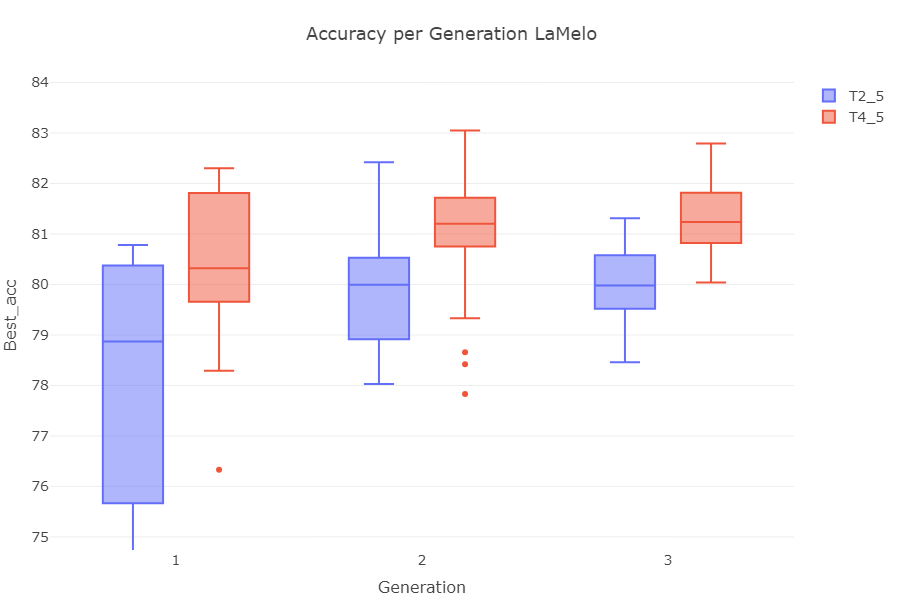

In [129]:
colors = ['#636EFA', '#EF553B', '#00CC96']
fig=plot_boxplots([train_data_baseline.reset_index(), train_data.reset_index()], x_column='generation', y_column='best_acc', colors=colors,  title=f'Accuracy per Generation {dataset}', names=[test_name_baseline, test_name])


In [130]:
test_name

'T4_5'

In [131]:
if not os.path.exists(f"thesis_plots/{dataset}/{test_name}"):
        os.mkdir(f"thesis_plots/{dataset}/{test_name}")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/box_plots_{test_name}_{test_name_baseline}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/box_plots_{test_name}_{test_name_baseline}.png", format="png")

In [132]:
total_df=pd.merge(results_df,train_data, on="name")
total_df.to_csv(f"thesis_plots/{dataset}/{test_name}/results_df.csv")

In [133]:
if not os.path.exists(f"thesis_plots/{dataset}/{test_name_baseline}"):
        os.mkdir(f"thesis_plots/{dataset}/{test_name_baseline}")
total_df_baseline=pd.merge(results_df_baseline,train_data_baseline, on="name")
total_df_baseline.to_csv(f"thesis_plots/{dataset}/{test_name_baseline}/results_df_baseline.csv")

## Line plots

In [134]:
train_data_cum_baseline=train_data_cum_baseline.reset_index()
train_data_cum=train_data_cum.reset_index()

In [135]:
gens=[1,2,3]

In [136]:

fil_df_baseline=train_data_cum_baseline[train_data_cum_baseline.generation.isin(gens)].set_index(["generation","name"])
fil_df=train_data_cum[train_data_cum.generation.isin(gens)].set_index(["generation","name"])

mean_df=pd.DataFrame([fil_df_baseline.mean().reset_index(drop=True),fil_df.mean().reset_index(drop=True)]).iloc[:,:-1].T.rename(columns={0:test_name_baseline,1:test_name})

min_q=0.0
#df_min=pd.DataFrame([train_data_cum.min().reset_index(drop=True),train_data_dist_cum.min().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min=pd.DataFrame([fil_df_baseline.quantile(min_q).reset_index(drop=True),fil_df.quantile(min_q).reset_index(drop=True)]).iloc[:,:-1].T.rename(columns={0:test_name_baseline,1:test_name})
df_min.columns=[test_name_baseline,test_name]

max_q=1.0
#df_max=pd.DataFrame([train_data_cum.max().reset_index(drop=True),train_data_dist_cum.max().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max=pd.DataFrame([fil_df_baseline.quantile(max_q).reset_index(drop=True),fil_df.quantile(max_q).reset_index(drop=True)]).iloc[:,:-1].T.rename(columns={0:test_name_baseline,1:test_name})
df_max.columns=[test_name_baseline,test_name]

In [137]:
mean_df

,T2_5,T4_5
0,10.049492,10.025085
1,59.620847,64.946610
2,70.685424,74.606610
3,75.284407,77.942373
4,77.527288,79.830339
5,78.981695,80.835424


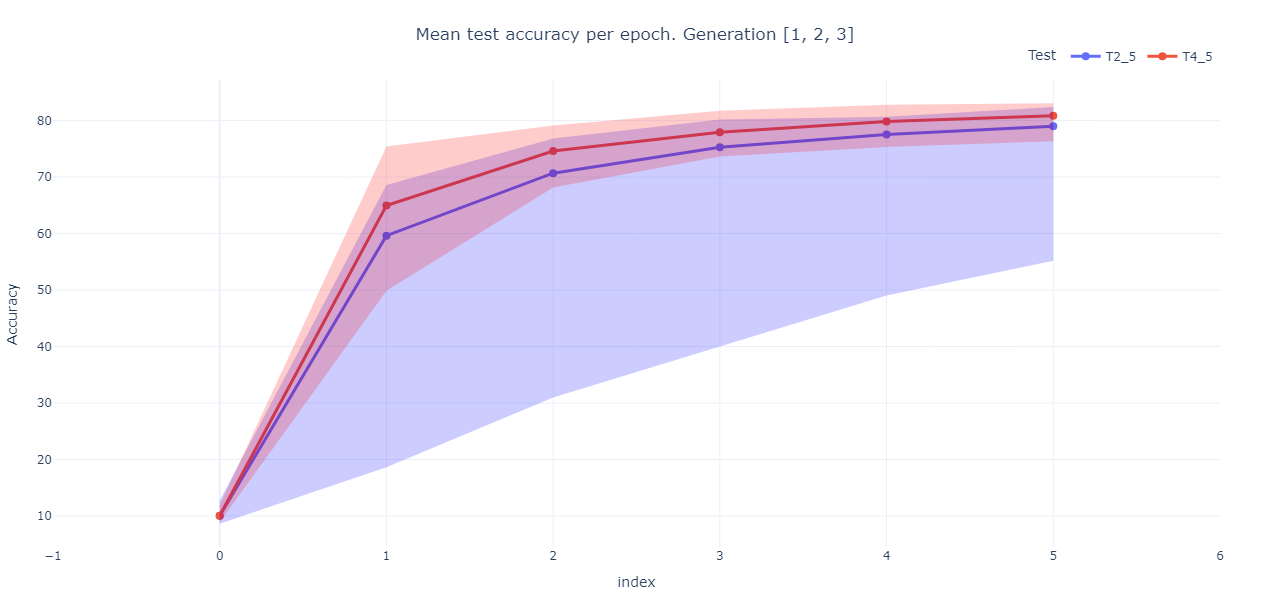

In [138]:
import plotly.express as px
import pandas as pd

# Assuming 'mean_df', 'df_min', and 'df_max' are your dataframes
fig = px.line(
    mean_df, 
    y=[test_name_baseline, test_name], 
    title='Mean test accuracy per epoch',
    labels={"Value": "Accuracy"},
    markers=True,  # Add markers to the lines
    template="plotly_white", 
    width=1000, height=600
)

# Update trace settings for the main plot
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Adding min-max range shadows for 'vanilla'
#fig.add_traces([
#    px.line(mean_df, y='vanilla').data[0],  # Add the vanilla mean line
#    px.line(mean_df, y='inheritance').data[0]  # Add the inheritance mean line
#])

fig.add_traces([
    # Min-max shadows for 'vanilla'
    dict(
        x=mean_df.index, 
        y=df_min[test_name_baseline], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max[test_name_baseline], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(0, 0, 255, 0.2)',  # Light red for shadow
        showlegend=False
    ),
    
    # Min-max shadows for 'inheritance'
    dict(
        x=mean_df.index, 
        y=df_min[test_name], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max[test_name], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(255, 0, 0, 0.2)',  # Light blue for shadow
        showlegend=False
    )
])

# Update layout settings
fig.update_layout(
    title={'text': f'Mean test accuracy per epoch. Generation {gens}', 'x':0.5, 'xanchor': 'center'},
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 6]),
    yaxis=dict(title="Accuracy"),
    legend=dict(title='Test', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()


In [317]:
fig.write_image(f"thesis_plots/{dataset}/{test_name}/line_plots_gens_{"_".join(map(str,gens))}_{test_name}_{test_name_baseline}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/line_plots_gens_{"_".join(map(str,gens))}_{test_name}_{test_name_baseline}.png", format="png")

Proxy augmentations plots

In [160]:
import pandas as pd
aug_dfs={}
corr_matrix={}
for dataset in ["adaline","caitie","chester","lamelo","mateo","sokoto", "sadie", "gutenberg"]:
    aug_dfs[dataset]=pd.read_csv(f"zcost_proxies/results/augs/ranks_{dataset}.csv", index_col=0)
    aug_dfs[dataset]["total_rank"]=aug_dfs[dataset]["total_rank"]*-1
    
    aug_dfs[dataset]["rank_proxy"]=aug_dfs[dataset].set_index("aug")["total_rank"].rank(ascending=False).values.astype(int)
    aug_dfs[dataset]["rank_acc"]=aug_dfs[dataset].set_index("aug")["test_acc"].rank(ascending=False).values.astype(int)
    corr_matrix[dataset]=aug_dfs[dataset][["fisher","jacob_cov","total_rank","test_acc", "val_acc"]].corr(method='spearman')
    
#corr_matrix={}
#for dataset in ["LaMelo","LaMelo_2","Gutenberg", "Adaline","Chester", "Gutenberg_2", "Sokoto","Adaline_2"]:
#    aug_dfs[dataset]=pd.read_csv(f"zcost_proxies/results/augs/total_rank_{dataset}.csv", index_col=0)
#    aug_dfs[dataset]["total_rank"]=aug_dfs[dataset]["total_rank"]*-1
    


In [74]:
#aug_dfs["Sokoto"]=aug_dfs["Sokoto"].reset_index().rename(columns={"fisher":"fisher_2","jacob_cov":"jacob_cov_2","total_rank":"total_rank_2"})
#aug_dfs["Chester"]=aug_dfs["Chester"].reset_index().rename(columns={"fisher":"fisher_2","jacob_cov":"jacob_cov_2","total_rank":"total_rank_2"})
aug_dfs["Adaline_2"]=aug_dfs["Adaline_2"].reset_index().rename(columns={"fisher":"fisher_2","jacob_cov":"jacob_cov_2","total_rank":"total_rank_2"})
#aug_dfs["Adaline"]=aug_dfs["Adaline"].reset_index().rename(columns={"fisher":"fisher_2","jacob_cov":"jacob_cov_2","total_rank":"total_rank_2"})
#aug_dfs["LaMelo_2"]=aug_dfs["LaMelo_2"].reset_index().rename(columns={"fisher":"fisher_2","jacob_cov":"jacob_cov_2","total_rank":"total_rank_2"})
#aug_dfs["Gutenberg"]=aug_dfs["Gutenberg"].reset_index().rename(columns={"fisher":"fisher_2","jacob_cov":"jacob_cov_2","total_rank":"total_rank_2"})
#aug_dfs["Gutenberg_2"]=aug_dfs["Gutenberg_2"].reset_index().rename(columns={"fisher":"fisher_2","jacob_cov":"jacob_cov_2","total_rank":"total_rank_2"})

In [75]:
#corr_matrix[dataset]=pd.merge(aug_dfs["chester"], aug_dfs["Chester"], on="aug").corr(method='spearman')

corr_matrix[dataset]=pd.merge(aug_dfs["adaline"], aug_dfs["Adaline_2"], on="aug").corr(method='spearman')
#corr_matrix[dataset]=pd.merge(aug_dfs["lamelo"], aug_dfs["LaMelo_2"], on="aug").corr(method='spearman')
#corr_matrix[dataset]=pd.merge(aug_dfs["gutenberg"], aug_dfs["Gutenberg"], on="aug").corr(method='spearman')
#corr_matrix[dataset]=pd.merge(aug_dfs["gutenberg"], aug_dfs["Gutenberg_2"], on="aug").corr(method='spearman')
#corr_matrix[dataset]=pd.merge(aug_dfs["sokoto"], aug_dfs["Sokoto"], on="aug").corr(method='spearman')

In [36]:
aug_dfs["Gutenberg"].sort_values(by="total_rank_2", ascending=False)

,aug,fisher_2,jacob_cov_2,total_rank_2
0,1,0.052051,0.304094,-0.356145
1,3,0.327821,0.078630,-0.406451
2,2,0.340895,0.203902,-0.544797
3,11,0.269214,0.593749,-0.862963
4,12,0.268348,0.700903,-0.969251
5,13,0.350690,0.650795,-1.001485
6,14,0.316527,0.709901,-1.026429
7,5,0.799334,0.274622,-1.073955
8,7,0.477784,0.618644,-1.096428
9,0,0.502220,0.640464,-1.142684


In [80]:
aug_dfs["adaline"].sort_values(by="total_rank")

,aug,fisher,jacob_cov,plain,total_rank,test_acc,val_acc,train_acc,epoch_time
20,17,0.802549,0.889071,0.516167,-1.691620,41.25,44.540001,97.856567,22.630426
21,16,0.824836,0.828267,0.491571,-1.653103,29.57,33.786667,97.936699,22.453781
18,18,0.760832,0.713175,0.456286,-1.474007,10.77,15.593333,86.554039,24.910084
11,21,0.675888,0.668799,0.475250,-1.344687,5.12,10.840000,55.956196,26.748872
16,13,0.744447,0.583877,0.506072,-1.328324,93.71,92.986671,99.494743,20.952173
19,12,0.772220,0.547516,0.427963,-1.319736,94.63,94.080002,99.879807,18.494953
17,15,0.754654,0.547390,0.471168,-1.302044,19.43,26.533333,95.014244,22.396068
15,20,0.726359,0.564209,0.471498,-1.290568,27.07,30.953333,93.035522,26.579179
9,11,0.670069,0.553716,0.577340,-1.223785,94.99,94.433334,98.415245,20.223458
7,14,0.651571,0.568542,0.443225,-1.220112,94.29,93.393333,97.749733,21.581148


In [81]:
aug_dfs["Adaline"]

,fisher,jacob_cov,total_rank
aug,,,
4,0.148314,0.262447,-0.410761
5,0.136277,0.433366,-0.569642
3,0.065044,0.564455,-0.629500
1,0.054202,0.646249,-0.700451
2,0.044286,0.681230,-0.725516
7,0.347975,0.536132,-0.884107
6,0.286825,0.628470,-0.915294
0,0.751600,0.213321,-0.964920
8,0.713620,0.297574,-1.011193


In [76]:
dataset="Adaline_2"

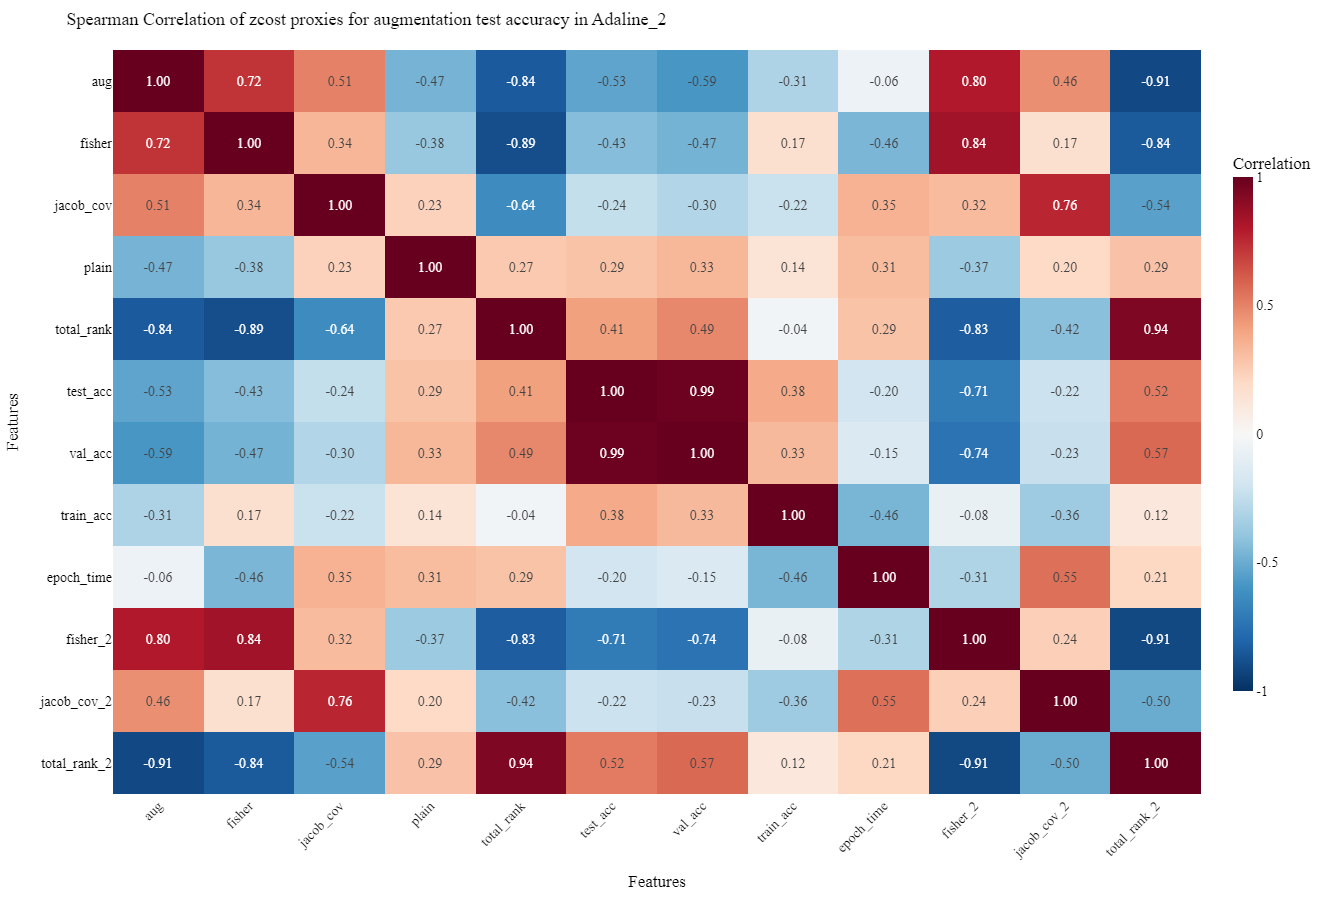

In [77]:
import plotly.express as px
# Create a heatmap with improved design
fig = px.imshow(
    corr_matrix[dataset],
    text_auto=".2f",  # Format correlation values to 2 decimal points
    aspect="auto",
    color_continuous_scale="RdBu_r",  # Use red to blue color scheme
    zmin=-1, zmax=1,  # Correlation ranges from -1 to 1
    title=f"Spearman Correlation of zcost proxies for augmentation test accuracy in {dataset}"
)

# Update layout for paper quality
fig.update_layout(
    title_font=dict(size=18, family='Times New Roman', color='black'),
    xaxis_title='Features',
    yaxis_title='Features',
    font=dict(family='Times New Roman', size=14, color='black'),
    coloraxis_colorbar=dict(
        title="Correlation",
        tickvals=[-1, -0.5, 0, 0.5, 1],  # Set specific tick values
        ticktext=["-1", "-0.5", "0", "0.5", "1"],
        len=0.75,  # Colorbar length
        thickness=20  # Colorbar thickness for better visibility
    ),
    width=1200,  # Set the width of the figure
    height=900,
    margin=dict(l=40, r=40, t=50, b=40)  # Adjust margins
)

# Fine-tune axis labels
fig.update_xaxes(tickangle=-45)  # Rotate x-axis labels for better readability

# Show the heatmap
fig.show()

In [6]:
fig.write_image(f"zcost_proxies/results/augs/{dataset}_augs.svg", format="svg")
fig.write_image(f"zcost_proxies/results/augs/{dataset}_augs.png", format="png")

In [62]:
corr_matrix.loc["total_rank","test_acc"]

0.7402597402597403

In [127]:
fisher={}
jacob_cov={}
total_rank={}
for dataset in ["adaline","caitie","chester","lamelo","mateo","sokoto", "sadie", "gutenberg"]:
    fisher[dataset]=corr_matrix[dataset].loc["fisher","test_acc"]*-1
    jacob_cov[dataset]=corr_matrix[dataset].loc["jacob_cov","test_acc"]*-1
    total_rank[dataset]=corr_matrix[dataset].loc["total_rank","test_acc"]

In [128]:
fisher_df=pd.DataFrame([fisher], index=["fisher"])
jacob_df=pd.DataFrame([jacob_cov], index=["jacob_cov"])
total_df=pd.DataFrame([total_rank], index=["total_rank"])

In [129]:
corrs_df=pd.concat([fisher_df,jacob_df, total_df]).T.sort_values(by="total_rank")

In [11]:
dataset="gutenberg"
resnet_scores_df=[]
for i in range(23):
    try:
        df_aux_resnet=pd.read_csv(f"/home/woody/iwb3/iwb3021h/THESIS_RESULTS/full_training_evonas/finetuning/{dataset}/augmentations_test_resnet/{dataset}/aug_{i}/test_acc.csv", index_col=0)
        df_aux_resnet["aug"]=i
        resnet_scores_df.append(df_aux_resnet)

    except:
        print(f"{i} not possible")
resnet_scores_df=pd.concat(resnet_scores_df).rename(columns={"test_acc":"Resnet"})

rg_scores_df=[]
for i in range(23):
    try:
        df_aux=pd.read_csv(f"/home/woody/iwb3/iwb3021h/THESIS_RESULTS/full_training_evonas/finetuning/{dataset}/augmentations_test_1/{dataset}/aug_{i}/test_acc.csv", index_col=0)
        df_aux["aug"]=i
        rg_scores_df.append(df_aux)

    except:
        print(f"{i} not possible")
rg_scores_df=pd.concat(rg_scores_df).rename(columns={"test_acc":"RegNet"})

scores_merged=pd.merge(rg_scores_df, resnet_scores_df, on="aug")

0 not possible
1 not possible
2 not possible
3 not possible
4 not possible
5 not possible
6 not possible
7 not possible
8 not possible
9 not possible
10 not possible
11 not possible
12 not possible
13 not possible
14 not possible
15 not possible
16 not possible
17 not possible
18 not possible
19 not possible
20 not possible
21 not possible
22 not possible


ValueError: No objects to concatenate

In [112]:
from scipy.stats import spearmanr
#corrs_regnet={}
corrs_regnet[dataset.lower()]=spearmanr(scores_merged["RegNet"],scores_merged["Resnet"])[0]


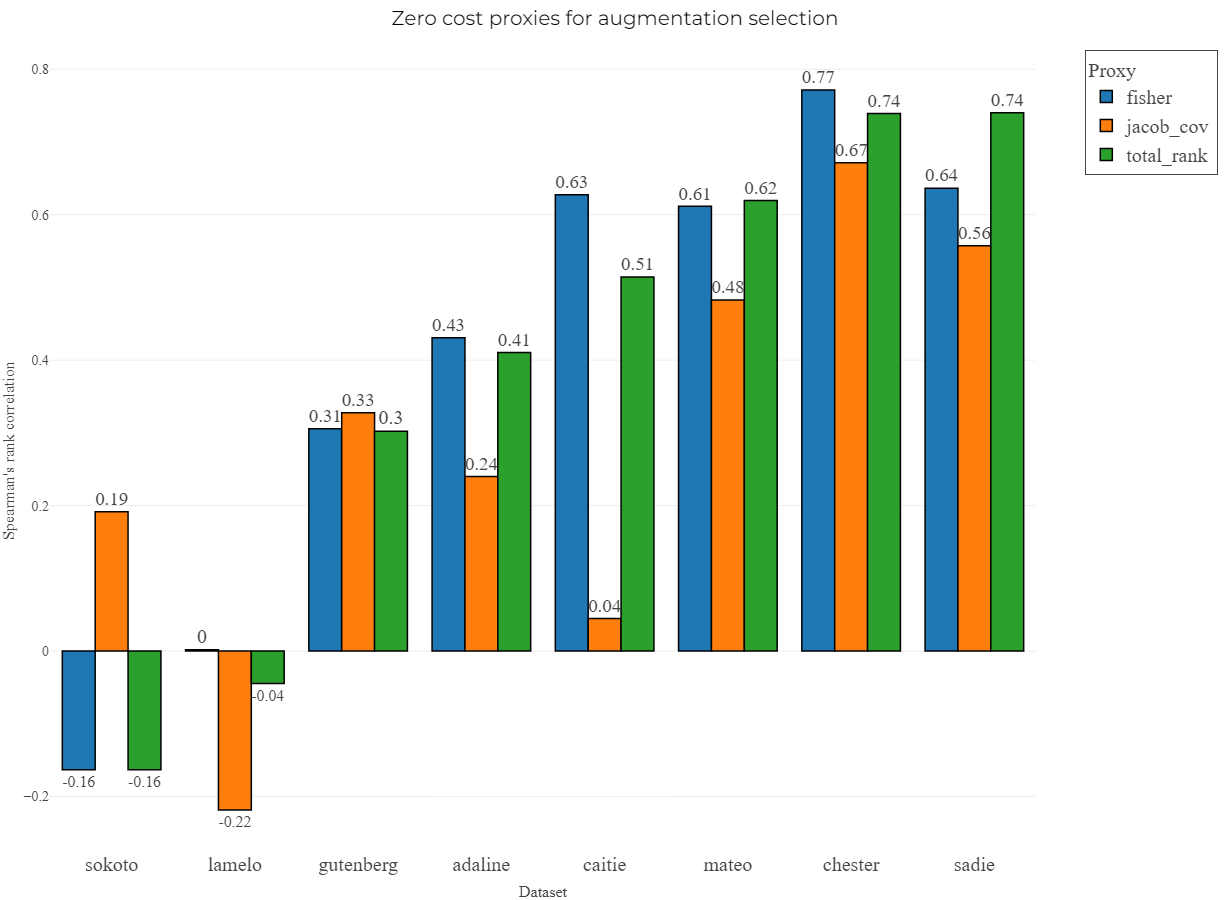

In [132]:

import plotly.graph_objects as go
fig = go.Figure()

# Define colors for each column for better visual differentiation
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Professional, distinguishable color scheme

# Add bars for each column with scientific formatting
for i, col in enumerate(corrs_df.columns):
    fig.add_trace(go.Bar(
        x=corrs_df.index,
        y=corrs_df[col],
        name=col,  # Each bar group named after the column
        marker_color=colors[i],  # Set the custom color for each bar group
        text=corrs_df[col].round(2),  # Display the values as text on the bars
        textposition='outside',  # Position the text outside the bars
        textfont=dict(size=20, family='Times New Roman'),  # Customize the text font
    ))

# Update the layout for a clean, professional look with legend on the right side
fig.update_layout(
    title="Zero cost proxies for augmentation selection",  # Title of the plot
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis=dict(
        title="Dataset",  # X-axis label
        tickmode='linear',
        tickfont=dict(family='Times New Roman', size=20),
        title_font=dict(size=16, family='Times New Roman'),
        showgrid=False  # Remove grid for a cleaner look
    ),
    yaxis=dict(
        title="Spearman's rank correlation",  # Y-axis label
        title_font=dict(size=16, family='Times New Roman'),
        tickfont=dict(family='Times New Roman', size=14),
        showgrid=True,  # Optional: gridlines for y-axis to aid interpretation
        zeroline=False  # Remove the default zero line for clarity
    ),
    barmode='group',  # Grouped bars for better comparison
    font=dict(family='Times New Roman', size=14),  # Set the overall font for the figure
    legend=dict(
        title="Proxy",  # Legend title
        title_font=dict(family='Times New Roman', size=20),
        font=dict(family='Times New Roman', size=20),
        x=1.05,  # Move the legend to the right of the plot
        y=1,  # Keep the legend at the top
        xanchor="left",  # Anchor the legend to the left of its position
        borderwidth=1,  # Optional: Add a border around the legend for clarity
    ),
    margin=dict(l=50, r=100, t=50, b=50),  # Increase right margin to accommodate the legend
    width=1200,  # Set figure width
    height=900,  # Set figure height
    template="presentation",
    plot_bgcolor='white',  # Background color

)
fig.update_traces(
    texttemplate='%{text}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the plot
fig.show()

In [133]:
fig.write_image("zcost_proxies/results/augs/corrs_barplot.png",format="png")
fig.write_image("zcost_proxies/results/augs/corrs_barplot.svg",format="svg")

In [11]:
dataset="mateo"
test_acc_df=aug_dfs[dataset][["aug","test_acc"]].sort_values(by="aug").set_index("aug")

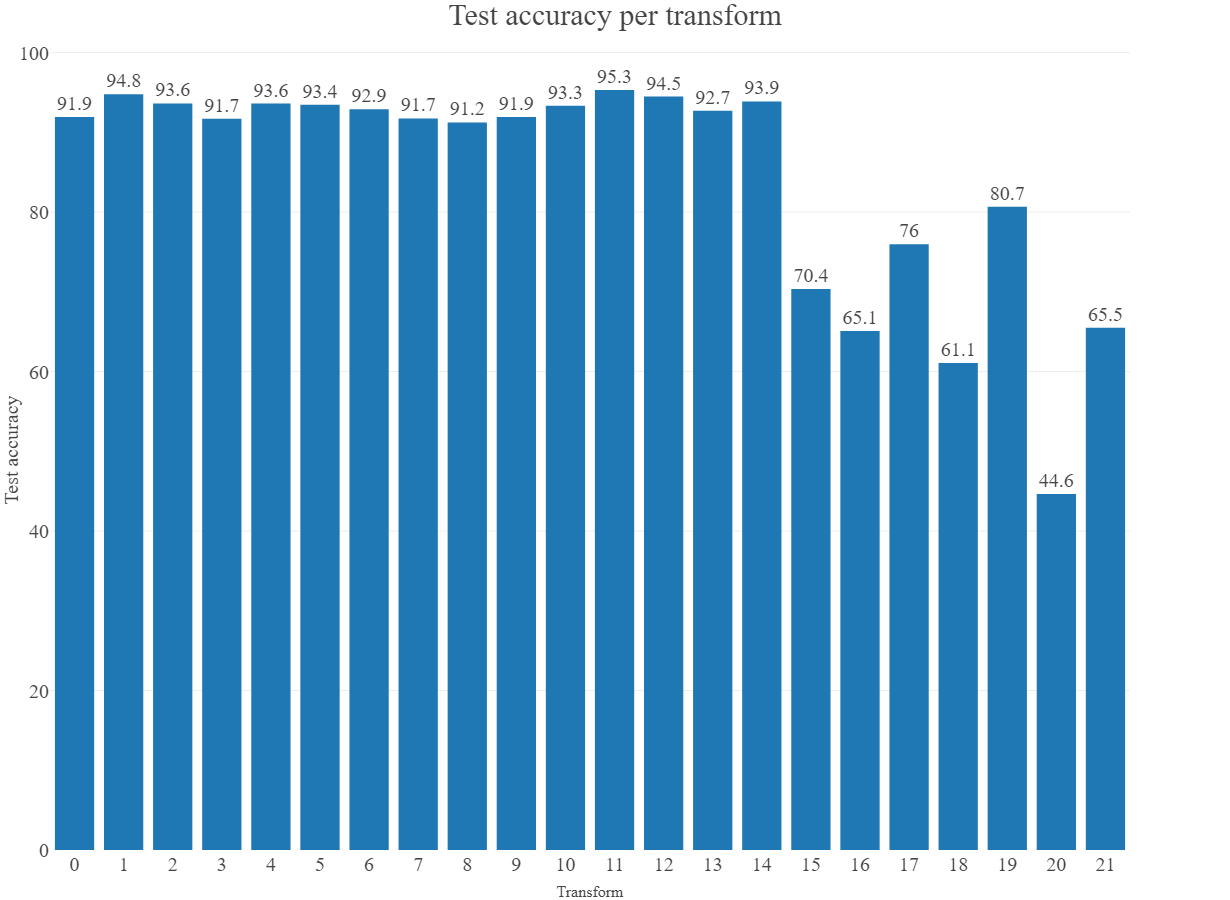

In [12]:
import plotly.graph_objects as go
fig = go.Figure()

# Define colors for each column for better visual differentiation
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Professional, distinguishable color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Professional, distinguishable color scheme


# Add bars for each column with scientific formatting
for i, col in enumerate(test_acc_df.columns):
    fig.add_trace(go.Bar(
        x=test_acc_df.index,
        y=test_acc_df[col],
        name=col,  # Each bar group named after the column
        marker_color=colors[i],  # Set the custom color for each bar group
        text=test_acc_df[col].round(1),  # Display the values as text on the bars
        textposition='outside',  # Position the text outside the bars
        textfont=dict(size=20, family='Times New Roman'),  # Customize the text font
    ))

# Update the layout for a clean, professional look with legend on the right side
fig.update_layout(
    title="Test accuracy per transform",  # Title of the plot
    title_font=dict(size=30, family='Times New Roman'),  # Font for the title
    xaxis=dict(
        title="Transform",  # X-axis label
        tickmode='linear',
        tickfont=dict(family='Times New Roman', size=20),
        title_font=dict(size=16, family='Times New Roman'),
        showgrid=False  # Remove grid for a cleaner look
    ),
    yaxis=dict(
        title="Test accuracy",  # Y-axis label
        title_font=dict(size=20, family='Times New Roman'),
        tickfont=dict(family='Times New Roman', size=20),
        showgrid=True,  # Optional: gridlines for y-axis to aid interpretation
        zeroline=False  # Remove the default zero line for clarity
    ),
    barmode='group',  # Grouped bars for better comparison
    font=dict(family='Times New Roman', size=14),  # Set the overall font for the figure
    legend=dict(
        title="Proxy",  # Legend title
        title_font=dict(family='Times New Roman', size=20),
        font=dict(family='Times New Roman', size=20),
        x=1.05,  # Move the legend to the right of the plot
        y=1,  # Keep the legend at the top
        xanchor="left",  # Anchor the legend to the left of its position
        borderwidth=1,  # Optional: Add a border around the legend for clarity
    ),
    margin=dict(l=50, r=100, t=50, b=50),  # Increase right margin to accommodate the legend
    width=1200,  # Set figure width
    height=900,  # Set figure height
    template="presentation"
)

# Show the plot
fig.show()

In [13]:
fig.write_image(f"zcost_proxies/results/augs/test_accuracy_{dataset}.png",format="png")
fig.write_image(f"zcost_proxies/results/augs/test_accuracy_{dataset}.svg",format="svg")

In [3]:
datasets=list(aug_dfs.keys())

In [145]:
total_df_test=[]
for dataset in ["adaline","caitie","chester","lamelo","mateo","sokoto", "sadie", "gutenberg"]:
    df_test_acc=aug_dfs[dataset][["aug","test_acc"]].set_index("aug")
    #best_score=df_test_acc.loc[0, "test_acc"]
    #df_test_acc=df_test_acc/best_score
    df_test_acc["rank"]=df_test_acc.rank(ascending=False)
    total_df_test.append(df_test_acc)

In [146]:
total_df_test=pd.concat(total_df_test).reset_index().groupby("aug").mean().sort_values(by="rank",ascending=True)

In [147]:
total_df_test

,test_acc,rank
aug,,
14,72.375155,5.875000
1,72.808721,6.285714
5,70.741487,6.428571
11,71.481222,7.250000
9,72.031600,7.312500
4,69.897505,7.428571
12,71.834454,8.000000
2,68.302798,9.000000
13,70.924651,9.875000


In [148]:
total_df_test

,test_acc,rank
aug,,
14,72.375155,5.875000
1,72.808721,6.285714
5,70.741487,6.428571
11,71.481222,7.250000
9,72.031600,7.312500
4,69.897505,7.428571
12,71.834454,8.000000
2,68.302798,9.000000
13,70.924651,9.875000


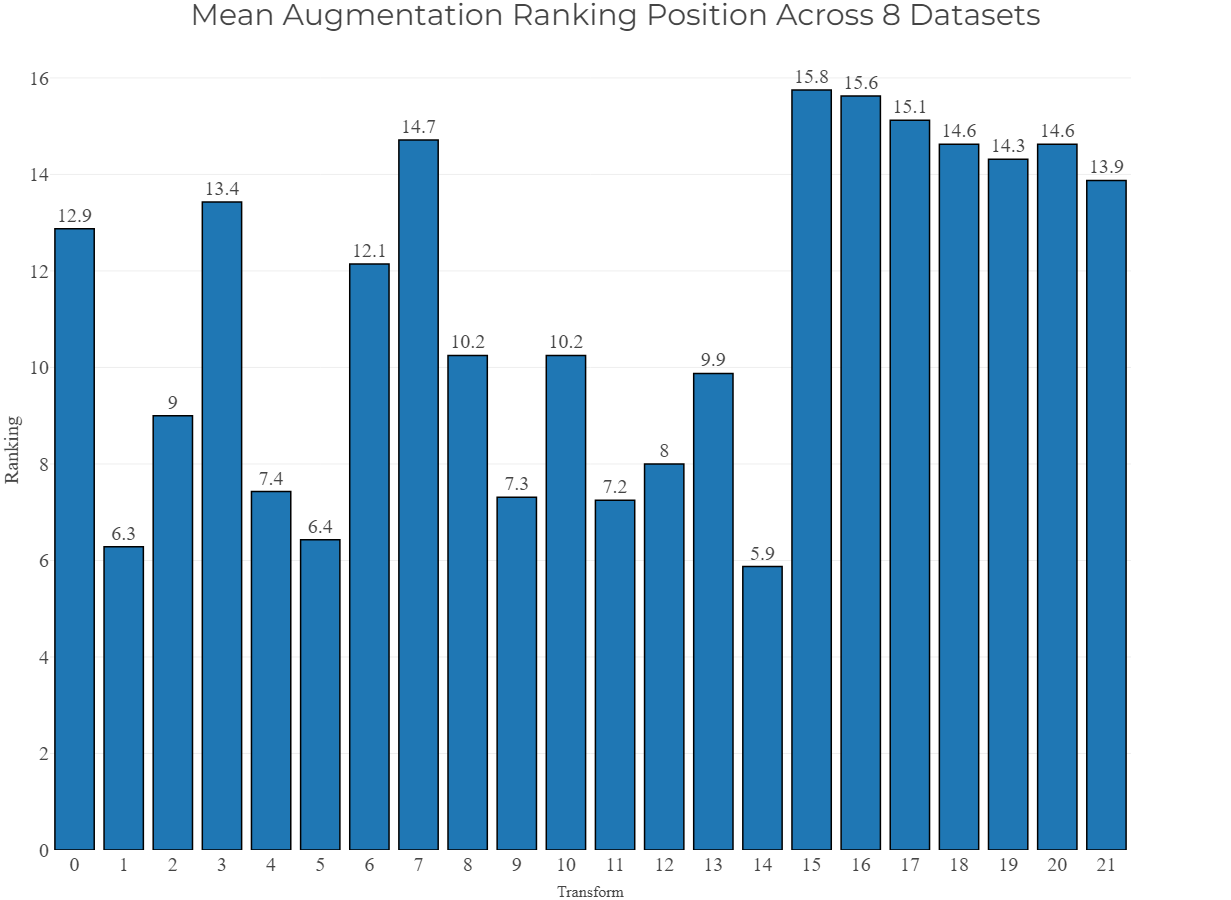

In [153]:
import plotly.graph_objects as go
fig = go.Figure()

# Define colors for each column for better visual differentiation
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Professional, distinguishable color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Professional, distinguishable color scheme


# Add bars for each column with scientific formatting
for i, col in enumerate(total_df_test[["rank"]].columns):
    fig.add_trace(go.Bar(
        x=total_df_test.index,
        y=total_df_test[col],
        name=col,  # Each bar group named after the column
        marker_color=colors[i],  # Set the custom color for each bar group
        text=total_df_test[col].round(1),  # Display the values as text on the bars
        textposition='outside',  # Position the text outside the bars
        textfont=dict(size=20, family='Times New Roman'),  # Customize the text font
    ))

# Update the layout for a clean, professional look with legend on the right side
fig.update_layout(
    title="Mean Augmentation Ranking Position Across 8 Datasets",  # Title of the plot
    title_font=dict(size=30, family='Montserrat'),  # Font for the title
    xaxis=dict(
        title="Transform",  # X-axis label
        tickmode='linear',
        tickfont=dict(family='Times New Roman', size=20),
        title_font=dict(size=16, family='Times New Roman'),
        showgrid=False  # Remove grid for a cleaner look
    ),
    yaxis=dict(
        title="Ranking",  # Y-axis label
        title_font=dict(size=20, family='Times New Roman'),
        tickfont=dict(family='Times New Roman', size=20),
        showgrid=True,  # Optional: gridlines for y-axis to aid interpretation
        zeroline=False  # Remove the default zero line for clarity
    ),
    barmode='group',  # Grouped bars for better comparison
    font=dict(family='Times New Roman', size=14),  # Set the overall font for the figure
    legend=dict(
        title="Proxy",  # Legend title
        title_font=dict(family='Times New Roman', size=20),
        font=dict(family='Times New Roman', size=20),
        x=1.05,  # Move the legend to the right of the plot
        y=1,  # Keep the legend at the top
        xanchor="left",  # Anchor the legend to the left of its position
        borderwidth=1,  # Optional: Add a border around the legend for clarity
    ),
    margin=dict(l=50, r=100, t=50, b=50),  # Increase right margin to accommodate the legend
    width=1400,  # Set figure width
    height=900,  # Set figure height
    template="presentation"
)
# Add gridlines and adjust bar text size
fig.update_traces(
    texttemplate='%{text}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)


# Show the plot
fig.show()

In [154]:
fig.write_image(f"zcost_proxies/results/augs/mean_ranking_datasets.png",format="png")
fig.write_image(f"zcost_proxies/results/augs/mean_ranking_datasets.svg",format="svg")

In [10]:
#fig.write_image(f"zcost_proxies/results/augs/mean_ranking_proxies_datasets.png",format="png")
#fig.write_image(f"zcost_proxies/results/augs/mean_ranking_proxies_datasets.svg",format="svg")

In [174]:
rank_pos_dict={}
for dataset in ["adaline","caitie","chester","lamelo","mateo","sokoto", "sadie", "gutenberg"]:
    #rank_pos_dict[dataset]=aug_dfs[dataset][aug_dfs[dataset].rank_proxy==1].rank_acc.values[0]
    rank_pos_dict[dataset]=aug_dfs[dataset][aug_dfs[dataset].aug==0].rank_acc.values[0]
rank_pos=pd.DataFrame([rank_pos_dict]).T.rename(columns={0:"Rank position"}).reset_index()
rank_pos["Rank position"]=rank_pos["Rank position"].astype(int)

In [175]:
aug_dfs[dataset][aug_dfs[dataset].aug==14]

,aug,fisher,jacob_cov,total_rank,test_acc,val_acc,train_acc,epoch_time,rank_proxy,rank_acc
5,14,0.502352,0.811039,-1.313391,45.116667,43.920002,62.482193,24.695626,7,2


In [163]:
rank_pos

,index,Rank position
0,adaline,8
1,caitie,9
2,chester,6
3,lamelo,3
4,mateo,6
5,sokoto,10
6,sadie,1
7,gutenberg,5


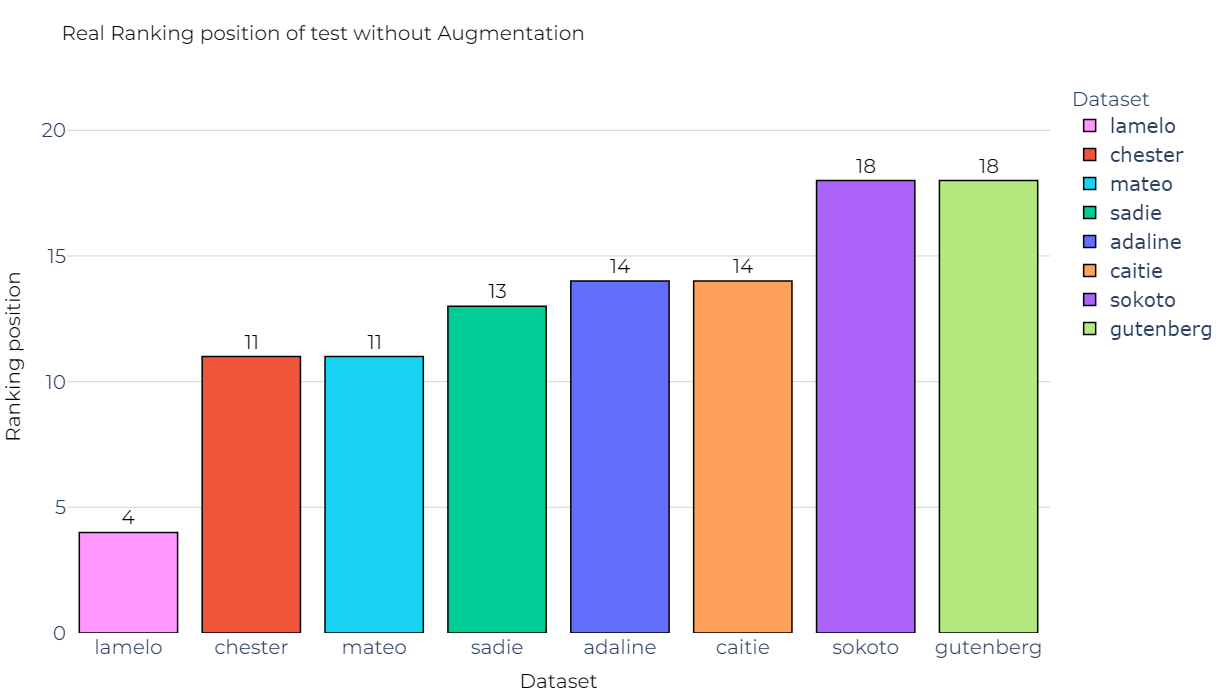

In [176]:
import plotly.express as px
color_map = {
    'adaline': '#636EFA',  # Blue
    'chester': '#EF553B',  # Red
    'sadie': '#00CC96',  # Green
    'sokoto': '#AB63FA',  # Purple
    'caitie': '#FFA15A',  # Orange
    'mateo': '#19D3F3',  # Cyan
    "gutenberg": "#B6E880",
    "lamelo": "#FF97FF",
    "Bonsai-Net": "#FFA07A",
    "BestCompetition": "#FECB52"
    #'T7_0': '#FF6692'   # Pink
}
fig = px.bar(rank_pos.sort_values(by="Rank position",ascending=True),#[total_sum_time_df["index"]!="T7_0"], 
             x="index", 
             y='Rank position', 
             text="Rank position",  # Display the score values on the bars
             color="index",  # Color by the index for distinction
            color_discrete_map=color_map,
             title='Real Ranking position of test without Augmentation')  # Add a meaningful title

# Customizing the layout for a more professional look
fig.update_layout(
    height=700,  # Increase the height
    width=900,  # Adjust the width
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis_title='Dataset',  # X-axis label
    yaxis_title='Ranking position',  # Y-axis label
    xaxis_title_font=dict(size=20, family='Montserrat', color='black'),  # X-axis title font
    yaxis_title_font=dict(size=20, family='Montserrat', color='black'),  # Y-axis title font
    xaxis_tickfont=dict(size=20, family='Montserrat'),  # X-axis tick labels font
    yaxis_tickfont=dict(size=20, family='Montserrat'),  # Y-axis tick labels font
    legend_title_text='Dataset',  # Legend title
    legend_title_font=dict(size=20, family='Montserrat'),  # Legend title font
    legend_font=dict(size=20),  # Legend labels font
    plot_bgcolor='white',  # Background color
    margin=dict(l=40, r=40, t=80, b=40),  # Margins around the plot
    yaxis=dict(gridcolor='lightgrey', range=[0,22])#, range=[0,8])  # Add light gridlines for better readability
    
)
fig.update_traces(textfont=dict(size=20, family='Montserrat', color='black'))
#fig.update_yaxes(range=[10, 22], row=row, col=col)

# Add gridlines and adjust bar text size
fig.update_traces(
    texttemplate='%{text}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the updated plot
fig.show()

In [177]:
fig.write_image(f"zcost_proxies/results/augs/noaug_real_ranking.png",format="png")
fig.write_image(f"zcost_proxies/results/augs/noaug_real_ranking.svg",format="svg")

# Population initilization Regressors plots

In [7]:
import pandas as pd
corr_dfs={
    "Epoch 5":[0.11, 0.38, 0.68, 0.56, 0.6, 0.49, 0.7],
    "Epoch 10":[0.27, 0.38, 0.79, 0.61, 0.67, 0.46, 0.75],
    #"Epoch 15":[0.54, 0.46, 0.81, 0.67, 0.69, 0.44, -0.11],
    "Epoch 20": [0.75, 0.62, 0.87, 0.78, 0.77, 0.51,  0.87],
    "RandomForest": [0.58, 0.2, 0.8, 0.82, 0.88, 0.88, 0.89],
    "SGD": [ 0.51, 0.18, 0.91, 0.82, 0.9, 0.85, 0.86]
}
#Dataset, Caitie, Chester, Gutenberg, LaMelo, Mateo, Sadie, Adaline

In [8]:
corrs_df=pd.DataFrame(corr_dfs).T

In [9]:
corrs_df.columns=["Caitie", "Chester", "Gutenberg", "LaMelo", "Mateo", "Sadie", "Adaline"]
#corrs_df=corrs_df.T

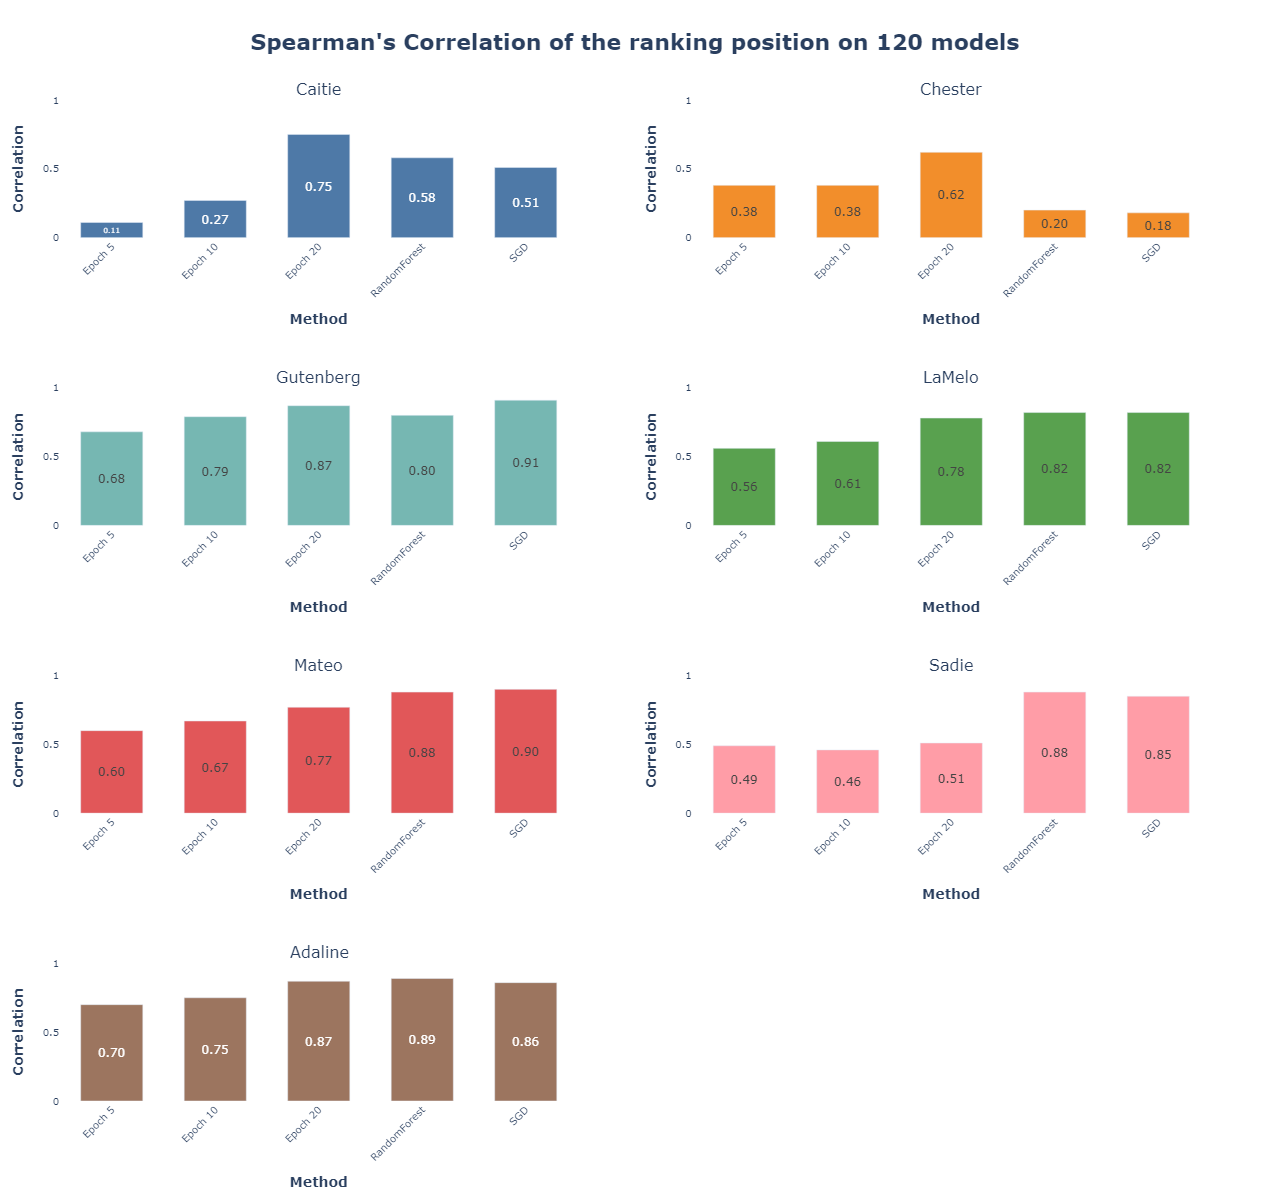

In [13]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots with a 4x2 grid
fig = sp.make_subplots(
    rows=4, cols=2, 
    subplot_titles=corrs_df.columns,
    horizontal_spacing=0.10,  # Add spacing between subplots
    vertical_spacing=0.15
)

# Defining a refined color palette for the bars
colors = ['#4E79A7', '#F28E2B', '#76B7B2', '#59A14F', '#E15759', '#FF9DA7', '#9C755F', '#EDC948']

# Adding traces for each column and displaying the scores inside each bar
for i, column in enumerate(corrs_df.columns):
    row = i // 2 + 1  # Adjust row based on 4 rows and 2 columns layout
    col = i % 2 + 1   # Adjust column based on 2 columns
    fig.add_trace(
        go.Bar(
            x=corrs_df.index, 
            y=corrs_df[column], 
            name=column, 
            marker_color=colors[i % len(colors)],  # Cycle through colors
            showlegend=False,  # Hide individual legends
            text=corrs_df[column],  # Display the score values
            textposition='inside',  # Position the text inside the bars
            texttemplate='%{text:.2f}',  # Format the text to 2 decimal places
            insidetextanchor='middle',  # Center the text within the bars
            width=0.6  # Adjust bar width to avoid clutter
        ),
        row=row, col=col
    )

# Fix the y-axis range between -0.5 and 0.8 for all subplots
for i, column in enumerate(corrs_df.columns):
    row = i // 2 + 1  # Adjust row
    col = i % 2 + 1   # Adjust column
    fig.update_yaxes(range=[0.0, 1.0], row=row, col=col)

# Update layout with professional design elements
fig.update_layout(
    height=1200,  # Increase height for better visualization
    width=800,  # Adjust width for 2-column layout
    title_text="<b>Spearman's Correlation of the ranking position on 120 models</b>",  # Make title bold
    title_font_size=22,  # Increase title font size
    title_x=0.5,  # Center the title
    font=dict(size=12),  # Adjust font size for axis labels and tick marks
    margin=dict(t=100, b=40, l=60, r=60),  # Adjust margins for balanced spacing
    paper_bgcolor='white',  # Set a clean white background
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
)

# Customize the axis titles and tick labels for better readability
fig.update_xaxes(title_text="<b>Method</b>", tickangle=-45, tickfont=dict(size=10))
fig.update_yaxes(title_text="<b>Correlation</b>", tickfont=dict(size=10))

# Show plot
fig.show()


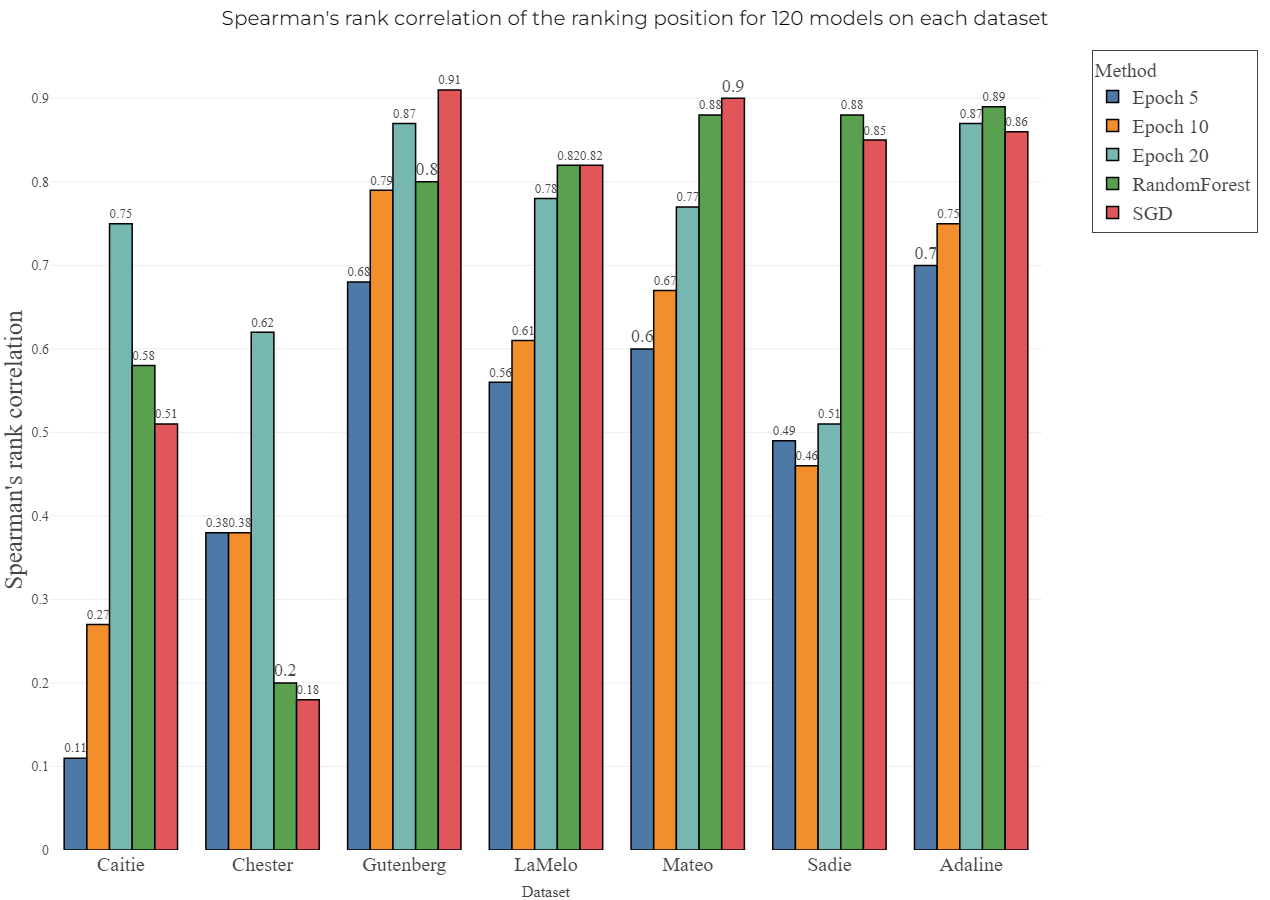

In [31]:
import plotly.graph_objects as go
fig = go.Figure()

# Define colors for each column for better visual differentiation
colors = ['#4E79A7', '#F28E2B', '#76B7B2', '#59A14F', '#E15759']  # Professional, distinguishable color scheme

color_map = {
    'T7_0': '#636EFA',  # Blue
    'T0_5': '#EF553B',  # Red
    'T1_5': '#00CC96',  # Green
    'T2_5': '#AB63FA',  # Purple
    'T4_5': '#FFA15A',  # Orange
    'T6_5': '#19D3F3',  # Cyan
    "ResNext": "#B6E880",
    "ResNet-18": "#FF97FF",
    "Bonsai-Net": "#FFA07A",
    "BestCompetition": "#FECB52"
    #'T7_0': '#FF6692'   # Pink
}

# Add bars for each column with scientific formatting
for i, col in enumerate(corrs_df.columns):
    fig.add_trace(go.Bar(
        x=corrs_df.index,
        y=corrs_df[col],
        name=col,  # Each bar group named after the column
        marker_color=colors[i],  # Set the custom color for each bar group
        text=corrs_df[col].round(2),  # Display the values as text on the bars
        textposition='outside',  # Position the text outside the bars
        textfont=dict(size=20, family='Times New Roman'),  # Customize the text font
    ))

# Update the layout for a clean, professional look with legend on the right side
fig.update_layout(
    title="Spearman's rank correlation of the ranking position for 120 models on each dataset",  # Title of the plot
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis=dict(
        title="Dataset",  # X-axis label
        tickmode='linear',
        tickfont=dict(family='Times New Roman', size=20),
        title_font=dict(size=16, family='Times New Roman'),
        showgrid=False  # Remove grid for a cleaner look
    ),
    yaxis=dict(
        title="Spearman's rank correlation",  # Y-axis label
        title_font=dict(size=25, family='Times New Roman'),
        tickfont=dict(family='Times New Roman', size=14),
        showgrid=True,  # Optional: gridlines for y-axis to aid interpretation
        zeroline=False  # Remove the default zero line for clarity
    ),
    barmode='group',  # Grouped bars for better comparison
    font=dict(family='Times New Roman', size=14),  # Set the overall font for the figure
    legend=dict(
        title="Method",  # Legend title
        title_font=dict(family='Times New Roman', size=20),
        font=dict(family='Times New Roman', size=20),
        x=1.05,  # Move the legend to the right of the plot
        y=1,  # Keep the legend at the top
        xanchor="left",  # Anchor the legend to the left of its position
        borderwidth=1,  # Optional: Add a border around the legend for clarity
    ),
    margin=dict(l=50, r=100, t=50, b=50),  # Increase right margin to accommodate the legend
    width=1200,  # Set figure width
    height=900,  # Set figure height
    template="presentation",
    plot_bgcolor='white',  # Background color

)
fig.update_traces(
    texttemplate='%{text}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the plot
fig.show()

In [14]:
fig.write_image(f"regressors/spearman_corr_v2.png",format="PNG")
fig.write_image(f"regressors/spearman_corr_v2.svg",format="SVG")